# Go-Bike Data Exploration
## by Jiwoon Kim

## Investigation Overview

Ford GoBike is the Bay Area's bike share system. (The name of this service/app had been changed to 'LYFT')

This presentation show what kind of attribute impact the usage pattern and duration of trip.
I'd like to figure out that what situations or what customers affect the features of my interest.


## Dataset Overview
The dataset used for this exploratory analysis consists of monthly individual trip data from January 2017 to May 2019.  
The variables I'll use include trip duration, start time and  rider's characteristics(gender, age, subscribing or not).

In [2]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

# suppress warnings from final outputss
import warnings
warnings.simplefilter("ignore")
df = pd.read_csv('df_0628.csv',  index_col=0)

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


## Rides Counts and Proportions by User group

I investigated the number of usage for each of the three characteristics.

#### 1.User Type  
 Subscriber is customers with a regular subscription, accounting for 89% of all usage.
 The rest are customers who use the service sometimes, accounting for 12 percent of total usage.
 
 
#### 2. Gender  
 Male are account for 74 percent of the total, which is about three times more than female's of 24 percent.

#### 3. Age Group   
 I divided users into six age groups : 10s,20s,30s,40s,50s and 60 to 80.
 Most are between the ages of 20 and 50.

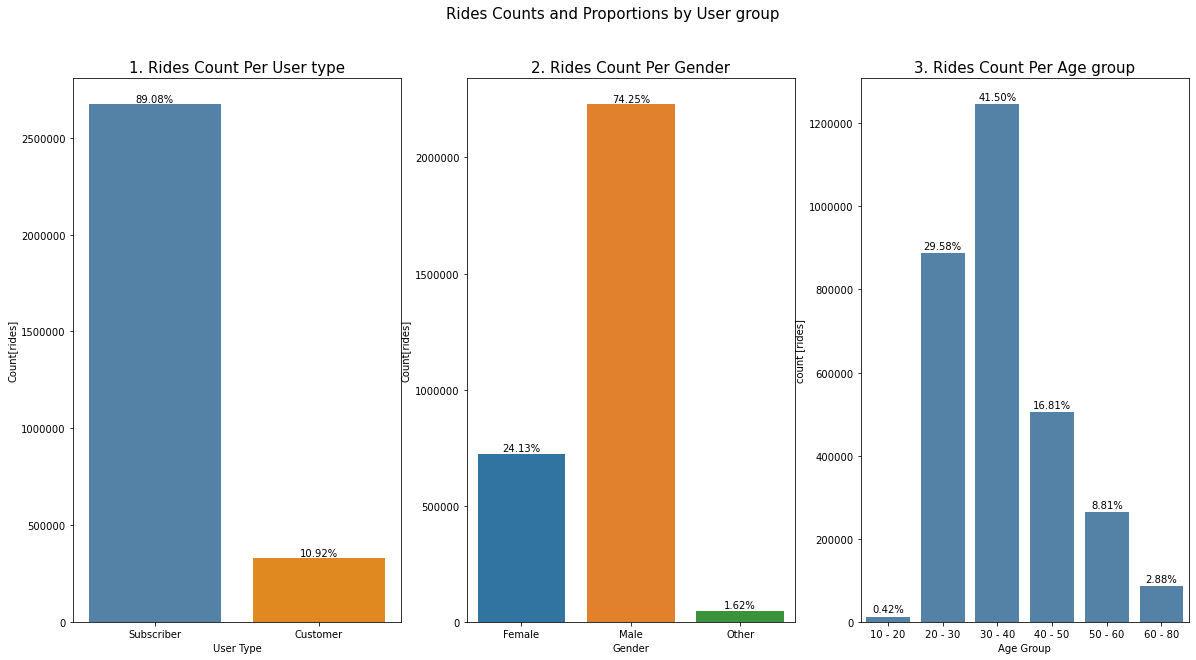

In [4]:
plt.figure(figsize=(20,10))
plt.suptitle('Rides Counts and Proportions by User group' , fontsize=15)

# User Type
plt.subplot(131)
ax1 = sns.countplot(df.user_type , palette=['steelblue','darkorange'])
total = len(df.user_type)
for p in ax1.patches:
    height = p.get_height()
    ax1.text(p.get_x()+p.get_width()/2 , height+10000 , '{:.2%}'.format(height/total) , ha = 'center')
plt.title('1. Rides Count Per User type', fontsize = 15);
plt.ticklabel_format(style = 'plain' , axis = 'y')
plt.xlabel('User Type')
plt.ylabel('Count[rides]');

# Gender
plt.subplot(132)
ax2 = sns.countplot(df.member_gender)
total = len(df.member_gender)
for p in ax2.patches:
    height = p.get_height()
    ax2.text(p.get_x()+p.get_width()/2 , height+10000 , '{:.2%}'.format(height/total) , ha = 'center')

plt.ticklabel_format(style = 'plain' , axis = 'y')
plt.title('2. Rides Count Per Gender', fontsize = 15)
plt.xlabel('Gender')
plt.ylabel('Count[rides]')

# Age
plt.subplot(133)
age_order =  ['10 - 20' , '20 - 30' , '30 - 40' , '40 - 50' ,'50 - 60' , '60 - 80'] 
ax3 = sns.countplot(x='member_age_bins' , color = 'steelblue' , data = df , order= age_order)
total = len(df.member_age_bins)
for p in ax3.patches:
    height = p.get_height()
    ax3.text(p.get_x()+p.get_width()/2 , height+10000 , '{:.2%}'.format(height/total) , ha = 'center')
plt.title('3. Rides Count Per Age group', size=15)
plt.xlabel('Age Group')
plt.ylabel('count [rides]')
plt.ticklabel_format(style = 'plain' , axis = 'y')

## Montly Duration Trend by User Group

#### 1. Gender
  It always shows that the duration of women is longer than that of men.

#### 2. User Type
 The duration of customer over the entire period is longer, and th he duration of subscribers is more constant.

Text(0, 0.5, 'Duration (Seconds)')

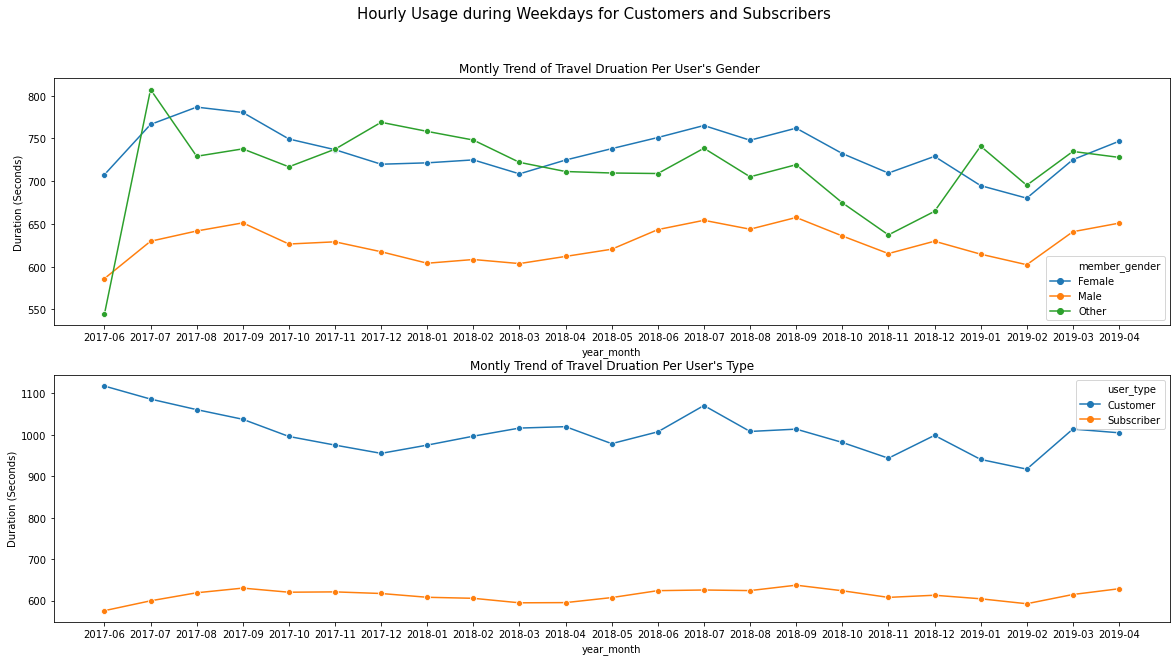

In [5]:
#Data - Montly average duration grouped-by User-type
montly_t_duration = df.groupby(['year_month','user_type']).agg({'duration_sec':'mean'})
montly_t_duration = montly_t_duration.reset_index()

#Data - Montly average duration grouped-by gender
montly_g_duration = df.groupby(['year_month','member_gender']).agg({'duration_sec':'mean'})
montly_g_duration = montly_g_duration.reset_index()


fig,ax = plt.subplots(2,1, figsize= [20,10])
plt.suptitle('Hourly Usage during Weekdays for Customers and Subscribers' , fontsize=15)

#plot groupy-gender
sns.lineplot(x='year_month' , y='duration_sec', hue='member_gender',style = 'member_gender', dashes=False, data=montly_g_duration , ax = ax[0], markers=["o", "o" ,"o"])
ax[0].set_title('Montly Trend of Travel Druation Per User\'s Gender ')
ax[0].set_ylabel('Duration (Seconds)')

#plot groupy-type
sns.lineplot(x='year_month' , y='duration_sec', hue='user_type', style = 'user_type' ,  dashes=False, data=montly_t_duration, ax = ax[1],markers=["o", "o" ])
ax[1].set_title('Montly Trend of Travel Druation Per User\'s Type')
ax[1].set_ylabel('Duration (Seconds)')

## Hourly Usage during Weekdays for Customers and Subscribers

The plot below give clear information of difference between the subscribers and customers.  
Subscribers ride bike on work days , Monday to Friday , whereas customers use the service during day on weekends , namely from 11 to 16 on saturday and sunday.

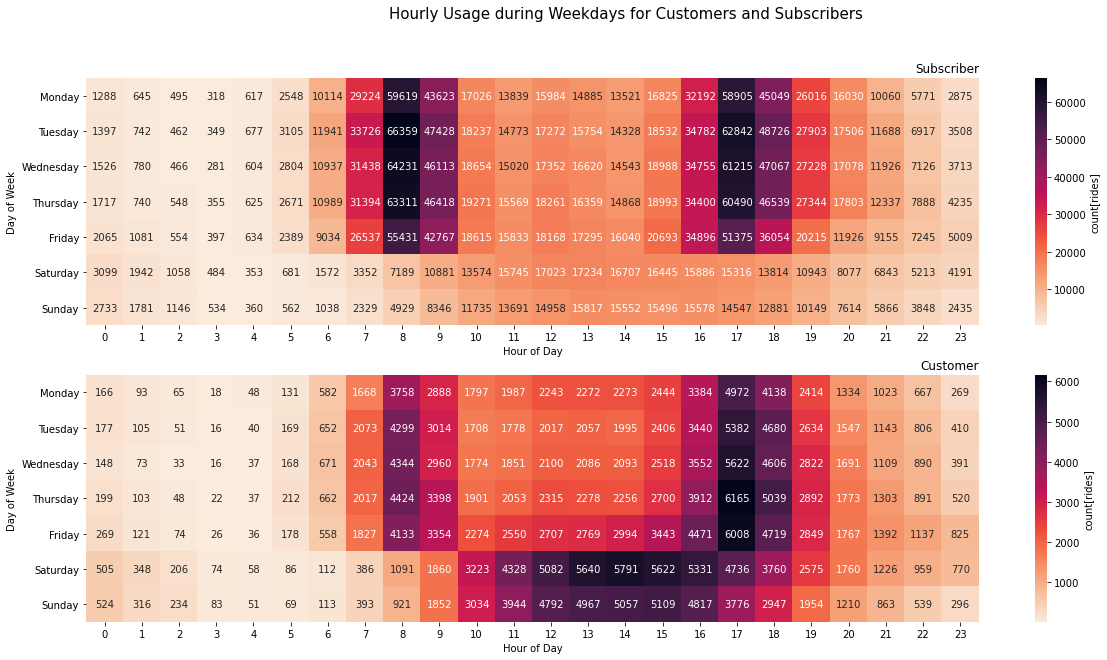

In [6]:
dow_order = ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']
plt.figure(figsize=(20,10))
plt.suptitle('Hourly Usage during Weekdays for Customers and Subscribers' , fontsize=15)

plt.subplot(2, 1, 1)
subscribers = df.query('user_type == "Subscriber"')
st_counts = subscribers.groupby(['start_dow', 'start_hour']).size()
st_counts = st_counts.reset_index(name='count')
st_counts = st_counts.pivot(index='start_dow', columns='start_hour', values='count')
st_counts = st_counts.loc[dow_order,:]
sns.heatmap(st_counts, cmap='rocket_r' , annot = True, fmt = 'd' , cbar_kws = {'label' : 'count[rides]'});
plt.title('Subscriber', loc='right');
plt.xlabel('Hour of Day');
plt.ylabel('Day of Week');

plt.subplot(2, 1, 2)
customers = df.query('user_type == "Customer"')
ct_counts = customers.groupby(['start_dow', 'start_hour']).size()
ct_counts = ct_counts.reset_index(name='count')
ct_counts = ct_counts.pivot(index='start_dow', columns='start_hour', values='count')
ct_counts = ct_counts.loc[dow_order,:]
sns.heatmap(ct_counts, cmap='rocket_r' , annot = True, fmt = 'd', cbar_kws = {'label' : 'count[rides]'});
plt.title('Customer', loc='right');
plt.xlabel('Hour of Day');
plt.ylabel('Day of Week');